# Modelling the Stock Market
### by Jérôme Blanchet


# Abstract


My name is Jerome Blanchet, my educational background is in pure mathematics and economics. I am senior analyst at CMHC national office. This is my personal data science site at Github. This is actually my first notebook ever and I am very excited about it. 
I am interested about Numerai, a Silicon Valley firm focusing about predicting the Stock Market.


# Table of Contents

Part 1) Data Exploration ....................................................................................................XXX
Part 2) Correlation Study....................................................................................................XXX.
Part 3) Preprocessing the Data...............................................................................................XXX.
Part 4) Modelling............................................................................................................XXX.

# Part 1) Data Exploration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import seaborn as sns
from pandas import DataFrame
import time

import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
pandas: 0.18.1
sklearn: 0.17.1


In [2]:
DATATRAIN = pd.read_csv("C:/Users/jeblanch/Documents/numerai_training_data.csv")
DATATEST = pd.read_csv("C:/Users/jeblanch/Documents/numerai_tournament_data.csv")

In [38]:
DATATRAIN.shape

(96320, 22)

In [3]:
DATATEST.shape

(36068, 22)

In [4]:
LIST_OF_VARIABLE_TRAIN = DATATRAIN.columns
LIST_OF_VARIABLE_TRAIN

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'target'],
      dtype='object')

In [5]:
LIST_OF_VARIABLE_TEST = DATATEST.columns
LIST_OF_VARIABLE_TEST

Index(['t_id', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'feature16', 'feature17', 'feature18', 'feature19', 'feature20',
       'feature21'],
      dtype='object')

In [6]:
DATATRAIN.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96320 entries, 0 to 96319
Data columns (total 22 columns):
feature1     96320 non-null float64
feature2     96320 non-null float64
feature3     96320 non-null float64
feature4     96320 non-null float64
feature5     96320 non-null float64
feature6     96320 non-null float64
feature7     96320 non-null float64
feature8     96320 non-null float64
feature9     96320 non-null float64
feature10    96320 non-null float64
feature11    96320 non-null float64
feature12    96320 non-null float64
feature13    96320 non-null float64
feature14    96320 non-null float64
feature15    96320 non-null float64
feature16    96320 non-null float64
feature17    96320 non-null float64
feature18    96320 non-null float64
feature19    96320 non-null float64
feature20    96320 non-null float64
feature21    96320 non-null float64
target       96320 non-null int64
dtypes: float64(21), int64(1)
memory usage: 16.2 MB


In [7]:
DATATEST.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36068 entries, 0 to 36067
Data columns (total 22 columns):
t_id         36068 non-null int64
feature1     36068 non-null float64
feature2     36068 non-null float64
feature3     36068 non-null float64
feature4     36068 non-null float64
feature5     36068 non-null float64
feature6     36068 non-null float64
feature7     36068 non-null float64
feature8     36068 non-null float64
feature9     36068 non-null float64
feature10    36068 non-null float64
feature11    36068 non-null float64
feature12    36068 non-null float64
feature13    36068 non-null float64
feature14    36068 non-null float64
feature15    36068 non-null float64
feature16    36068 non-null float64
feature17    36068 non-null float64
feature18    36068 non-null float64
feature19    36068 non-null float64
feature20    36068 non-null float64
feature21    36068 non-null float64
dtypes: float64(21), int64(1)
memory usage: 6.1 MB


In [40]:
DATATRAIN.head(10)

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0  0.240334  0.821445  0.188216  0.695935  0.275255  0.166727  0.277759   
1  0.105750  0.466393  0.788368  0.368201  0.449494  0.113514  0.821350   
2  0.760054  0.583935  0.889545  0.433781  0.457076  0.705108  0.696129   
3  0.352680  0.661547  0.589982  0.385830  0.391617  0.450011  0.792729   
4  0.019908  0.868553  0.000818  0.335975  0.389629  0.028062  0.260477   
5  0.065985  0.999651  0.141204  0.387729  0.556407  0.049982  0.756564   
6  0.025958  0.812446  0.020297  0.016361  0.172401  0.055885  0.728438   
7  0.074530  0.414900  0.100835  0.328859  0.982829  0.049982  0.057571   
8  0.289046  0.515981  0.102144  0.447891  0.922540  0.213526  0.416889   
9  0.019908  0.986324  0.000818  0.984612  0.056564  0.055227  0.696424   

   feature8  feature9  feature10   ...    feature13  feature14  feature15  \
0  0.393617  0.605746   0.539524   ...     0.468062   0.471368   0.360477   
1  0.391745  0.355628   0.825224   ...     0.613063   0.835725   0.127212   
2  0.536635  0.424145   0.528493   ...     0.308784   0.711350   0.876572   
3  0.808475  0.765055   0.725815   ...     0.243030   0.855269   0.574907   
4  0.592177  0.368580   0.314964   ...     0.088355   0.314851   0.062949   
5  0.993134  0.926070   0.782456   ...     0.137344   0.835725   0.047316   
6  0.169334  0.105625   0.554313   ...     0.132504   0.745825   0.306949   
7  0.613329  0.231352   0.916286   ...     0.582715   0.514075   0.007358   
8  0.623394  0.398634   0.652814   ...     0.182389   0.497853   0.588626   
9  0.999074  0.980332   0.923902   ...     0.514331   0.956333   0.097617   

   feature16  feature17  feature18  feature19  feature20  feature21  target  
0   0.386518   0.099932   0.212755   0.409194   0.553828   0.729039       0  
1   0.425440   0.724995   0.786288   0.339586   0.822786   0.347294       0  
2   0.590701   0.632564   0.981630   0.357089   0.597478   0.358644       1  
3   0.179726   0.669091   0.769714   0.197598   0.269451   0.694055       1  
4   0.350093   0.015169   0.017189   0.114457   0.460919   0.772721       1  
5   0.206469   0.145737   0.196290   0.233053   0.179772   0.865345       1  
6   0.126789   0.054349   0.031609   0.207763   0.000003   0.662274       0  
7   0.028916   0.114864   0.088552   0.289702   0.058578   0.017698       1  
8   0.057155   0.194329   0.063391   0.180515   0.409485   0.949708       1  
9   0.908160   0.021458   0.030649   0.124785   0.925503   0.973768       0  

[10 rows x 22 columns]

In [41]:
DATATRAIN.tail(10)

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
96310  0.176502  0.566769  0.981878  0.945782  0.276810  0.174979  0.998103   
96311  0.223942  0.183409  0.049142  0.719717  0.501864  0.099969  0.716252   
96312  0.336300  0.998195  0.059152  0.283737  0.122388  0.400059  0.999997   
96313  0.348455  0.333061  0.742855  0.368229  0.378083  0.502218  0.188132   
96314  0.211939  1.000000  0.141264  0.996355  0.788694  0.119216  0.601558   
96315  0.356030  0.466154  0.133134  0.633587  0.730852  0.618656  0.203344   
96316  0.979103  0.029792  0.897649  0.241760  0.889071  0.995205  0.189681   
96317  0.552004  0.538605  0.057178  0.257721  0.014369  0.375819  0.327223   
96318  0.983391  0.216766  0.761766  0.725756  0.513926  0.995205  0.294182   
96319  0.909717  0.636406  0.385877  0.235912  0.393591  0.929659  0.639843   

       feature8  feature9  feature10   ...    feature13  feature14  feature15  \
96310  0.383129  0.640737   0.883288   ...     0.550468   0.911521   0.210559   
96311  0.679134  0.778455   0.554346   ...     0.302714   0.655940   0.167251   
96312  0.725081  0.862732   0.905994   ...     0.026568   0.995295   0.103824   
96313  0.671378  0.399728   0.568182   ...     0.458021   0.219953   0.960639   
96314  0.839129  0.727855   0.526812   ...     0.631102   0.761867   0.032369   
96315  0.194309  0.652536   0.402444   ...     0.839791   0.476402   0.667939   
96316  0.005047  0.058213   0.133999   ...     0.908097   0.070958   0.991268   
96317  0.130128  0.212868   0.754834   ...     0.030030   0.169064   0.147803   
96318  0.786691  0.338694   0.528493   ...     0.395719   0.638913   0.919853   
96319  0.631019  0.298904   0.830670   ...     0.606739   0.758202   0.845307   

       feature16  feature17  feature18  feature19  feature20  feature21  \
96310   0.991422   0.939270   0.908591   0.346139   0.937858   0.744369   
96311   0.747147   0.097242   0.030649   0.521996   0.723062   0.500428   
96312   0.126391   0.098603   0.029591   0.036233   0.298445   0.913400   
96313   0.007767   0.854544   0.917074   0.486971   0.464848   0.519739   
96314   0.888108   0.041378   0.046331   0.479372   0.974270   0.957761   
96315   0.532310   0.332333   0.132560   0.791268   0.765534   0.977834   
96316   0.459192   0.927258   0.949742   0.890597   0.484764   0.021760   
96317   0.464191   0.012139   0.231630   0.036233   0.523291   0.756613   
96318   0.821184   0.473690   0.666406   0.585839   0.454968   0.016062   
96319   0.712064   0.506229   0.378119   0.420875   0.214825   0.326322   

       target  
96310       1  
96311       1  
96312       0  
96313       0  
96314       0  
96315       1  
96316       1  
96317       0  
96318       1  
96319       0  

[10 rows x 22 columns]

In [10]:
DATATEST.head(10)

t_id  feature1  feature2  feature3  feature4  feature5  feature6  \
0   3386  0.176502  0.071846  0.760401  0.603793  0.307923  0.326370   
1  15031  0.328742  0.966138  0.582574  0.993283  0.429349  0.140698   
2  16346  0.240334  0.162792  0.403378  0.766939  0.689899  0.535853   
3  21943  0.472823  0.474738  0.302930  0.623849  0.086283  0.367649   
4  10608  0.272245  0.245075  0.690044  0.960165  0.565562  0.191646   
5  13147  0.073011  0.884681  0.548301  0.656253  0.200540  0.060400   
6   6316  0.548575  0.749222  0.823218  0.055006  0.282549  0.241622   
7   6107  0.337244  0.145352  0.327472  0.643769  0.118757  0.452019   
8  31304  0.368471  0.337428  0.356741  0.952783  0.260766  0.505094   
9   7913  0.023972  0.934979  0.021236  0.922424  0.108549  0.138535   

   feature7  feature8  feature9    ...      feature12  feature13  feature14  \
0  0.714250  0.018619  0.251729    ...       0.137658   0.875955   0.704441   
1  0.610141  0.789572  0.959729    ...       0.881440   0.556472   0.482086   
2  0.325870  0.219154  0.326740    ...       0.174604   0.578646   0.182698   
3  0.869185  0.995174  0.986194    ...       0.289700   0.053721   0.960672   
4  0.265510  0.402866  0.344695    ...       0.079684   0.625458   0.267750   
5  0.875666  0.754155  0.806050    ...       0.878738   0.096389   0.974961   
6  0.289649  0.324297  0.210370    ...       0.514328   0.667008   0.598804   
7  0.539650  0.320263  0.471022    ...       0.289332   0.610730   0.875515   
8  0.696133  0.403002  0.402564    ...       0.091658   0.602687   0.808628   
9  0.875666  0.923405  0.920887    ...       0.918814   0.018492   0.987315   

   feature15  feature16  feature17  feature18  feature19  feature20  feature21  
0   0.491796   0.553368   0.623538   0.407551   0.657966   0.769546   0.529049  
1   0.265233   0.941844   0.390078   0.854559   0.269184   0.894264   0.982790  
2   0.210220   0.816385   0.712595   0.176998   0.771658   0.628776   0.164992  
3   0.220508   0.560766   0.216163   0.312070   0.120353   0.581951   0.579763  
4   0.300998   0.999414   0.830972   0.742335   0.643849   0.861303   0.168874  
5   0.238561   0.530308   0.489904   0.609126   0.130431   0.707005   0.946608  
6   0.761163   0.106132   0.644182   0.838805   0.499651   0.074308   0.681984  
7   0.391424   0.578357   0.203430   0.228352   0.359020   0.841741   0.423247  
8   0.663987   0.775117   0.517211   0.679346   0.451790   0.984150   0.261506  
9   0.144273   0.757315   0.008083   0.203948   0.018583   0.913834   0.897416  

[10 rows x 22 columns]

In [11]:
DATATEST.tail(10)

t_id  feature1  feature2  feature3  feature4  feature5  feature6  \
36058  19259  0.523991  0.793606  0.697335  0.711760  0.421294  0.433267   
36059  11731  0.914870  0.297459  0.942565  0.309791  0.758518  0.754079   
36060  31795  0.640791  0.081833  0.742818  0.496693  0.343533  0.394037   
36061  35140  0.928270  0.122193  0.663446  0.789762  0.479364  0.991619   
36062  19749  0.368471  0.669534  0.098075  0.553528  0.483324  0.934627   
36063  34825  0.229924  0.522585  0.224033  0.608738  0.850340  0.204239   
36064  28661  0.232006  0.036735  0.016110  0.937383  0.193579  0.456534   
36065  28029  0.170819  0.376142  0.104058  0.576250  0.170613  0.103123   
36066  24445  0.580027  0.269963  0.999422  0.243885  0.882878  0.950641   
36067  14160  0.777298  0.202355  0.499723  0.179951  0.035015  0.631239   

       feature7  feature8  feature9    ...      feature12  feature13  \
36058  0.764556  0.890915  0.852651    ...       0.743973   0.261150   
36059  0.947383  0.303245  0.662519    ...       0.369877   0.078251   
36060  0.081409  0.042411  0.520098    ...       0.540852   0.747386   
36061  0.347125  0.737124  0.848733    ...       0.105146   0.514483   
36062  0.068827  0.604151  0.209044    ...       0.386505   0.820694   
36063  0.708213  0.823260  0.854722    ...       0.266418   0.394360   
36064  0.720283  0.542888  0.777310    ...       0.245005   0.739411   
36065  0.114584  0.032431  0.115684    ...       0.490515   0.325861   
36066  0.032077  0.316402  0.305345    ...       0.173216   0.781514   
36067  0.164946  0.036768  0.127507    ...       0.465643   0.037666   

       feature14  feature15  feature16  feature17  feature18  feature19  \
36058   0.808525   0.739128   0.677730   0.611458   0.800880   0.096275   
36059   0.709705   0.588619   0.033180   0.825933   0.876671   0.188566   
36060   0.505349   0.967458   0.370510   0.631858   0.908623   0.658474   
36061   0.469391   0.955680   0.983580   0.911551   0.876671   0.449672   
36062   0.451404   0.507394   0.654210   0.375967   0.159814   0.479437   
36063   0.816355   0.459658   0.413875   0.149788   0.511595   0.277464   
36064   0.897916   0.325190   0.958455   0.065224   0.047403   0.430638   
36065   0.032075   0.261642   0.639008   0.125055   0.200552   0.584159   
36066   0.135811   0.606451   0.417508   0.928700   0.969049   0.995583   
36067   0.142782   0.626282   0.003867   0.526750   0.057566   0.089250   

       feature20  feature21  
36058   0.695423   0.658975  
36059   0.314155   0.261463  
36060   0.980180   0.502926  
36061   0.455429   0.007872  
36062   0.234370   0.646836  
36063   0.652344   0.389424  
36064   0.961065   0.257482  
36065   0.398318   0.633713  
36066   0.320254   0.398299  
36067   0.238636   0.681989  

[10 rows x 22 columns]

The number of missing value is zero for all variable

In [12]:
DATATRAIN.isnull().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
target       False
dtype: bool

In [13]:
DATATEST.isnull().any()

t_id         False
feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
dtype: bool

In [42]:
DATATRAIN.describe()

feature1      feature2      feature3      feature4      feature5  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.490624      0.506526      0.501153      0.511202      0.482551   
std        0.287678      0.295668      0.289097      0.294220      0.291502   
min        0.000162      0.000000      0.000000      0.000000      0.000000   
25%        0.244734      0.244226      0.259109      0.252076      0.232631   
50%        0.488900      0.514579      0.493395      0.503746      0.469295   
75%        0.746915      0.761702      0.761766      0.777905      0.738110   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           feature6      feature7      feature8      feature9     feature10  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.495704      0.485308      0.498239      0.510794      0.495533   
std        0.289780      0.288916      0.292319      0.300019      0.282865   
min        0.000021      0.000000      0.000000      0.000000      0.000000   
25%        0.233360      0.240383      0.240802      0.247976      0.252352   
50%        0.500993      0.482828      0.500036      0.502065      0.495351   
75%        0.746194      0.734963      0.748607      0.784585      0.734211   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           ...          feature13     feature14     feature15     feature16  \
count      ...       96320.000000  96320.000000  96320.000000  96320.000000   
mean       ...           0.497240      0.499253      0.495861      0.530852   
std        ...           0.284514      0.298824      0.289826      0.295788   
min        ...           0.000111      0.000013      0.000000      0.000000   
25%        ...           0.259664      0.229475      0.255347      0.269598   
50%        ...           0.504632      0.499284      0.494369      0.533040   
75%        ...           0.740331      0.754282      0.745505      0.798631   
max        ...           1.000000      1.000000      1.000000      1.000000   

          feature17     feature18     feature19     feature20     feature21  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.499036      0.498495      0.509935      0.489330      0.505263   
std        0.284427      0.295677      0.284826      0.286131      0.292375   
min        0.000000      0.000000      0.000045      0.000003      0.000626   
25%        0.260134      0.235475      0.268794      0.252535      0.257578   
50%        0.510162      0.499798      0.515547      0.469587      0.506960   
75%        0.745460      0.758530      0.758363      0.735136      0.753504   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             target  
count  96320.000000  
mean       0.505170  
std        0.499976  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 22 columns]

In [15]:
DATATEST.describe()

t_id      feature1      feature2      feature3      feature4  \
count  36068.000000  36068.000000  36068.000000  36068.000000  36068.000000   
mean   18034.500000      0.485036      0.506344      0.498644      0.512040   
std    10412.079091      0.286279      0.294379      0.288053      0.291243   
min        1.000000      0.000000      0.000557      0.000588      0.000677   
25%     9017.750000      0.241214      0.245075      0.258238      0.252076   
50%    18034.500000      0.483991      0.514437      0.492173      0.500149   
75%    27051.250000      0.737348      0.761005      0.757661      0.777718   
max    36068.000000      1.000000      1.000000      1.000000      1.000000   

           feature5      feature6      feature7      feature8      feature9  \
count  36068.000000  36068.000000  36068.000000  3.606800e+04  36068.000000   
mean       0.481700      0.484690      0.486572  4.982109e-01      0.507894   
std        0.287656      0.286976      0.286309  2.913888e-01      0.297944   
min        0.000076      0.000000      0.000869  8.605150e-07      0.000006   
25%        0.233221      0.223220      0.245494  2.465905e-01      0.249377   
50%        0.469341      0.477007      0.482941  4.999997e-01      0.498266   
75%        0.730852      0.733230      0.732388  7.466455e-01      0.779003   
max        1.000000      1.000000      1.000000  1.000000e+00      1.000000   

           ...          feature12     feature13     feature14     feature15  \
count      ...       36068.000000  36068.000000  36068.000000  36068.000000   
mean       ...           0.485024      0.496269      0.501611      0.494054   
std        ...           0.293149      0.283932      0.297590      0.285308   
min        ...           0.000157      0.000000      0.000000      0.000904   
25%        ...           0.226042      0.261112      0.240828      0.261642   
50%        ...           0.473827      0.502221      0.501321      0.494369   
75%        ...           0.752297      0.739343      0.755059      0.737564   
max        ...           1.000000      1.000000      1.000000      1.000000   

          feature16     feature17     feature18     feature19     feature20  \
count  36068.000000  36068.000000  36068.000000  36068.000000  36068.000000   
mean       0.534660      0.492300      0.497932      0.509878      0.489155   
std        0.291287      0.283594      0.292439      0.284515      0.283571   
min        0.000198      0.000017      0.000047      0.000000      0.000003   
25%        0.291781      0.247901      0.238305      0.269184      0.249947   
50%        0.535047      0.506127      0.500799      0.513511      0.472514   
75%        0.797524      0.730893      0.754600      0.759685      0.732251   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          feature21  
count  36068.000000  
mean       0.507944  
std        0.288992  
min        0.000626  
25%        0.265444  
50%        0.509609  
75%        0.752837  
max        1.000000  

[8 rows x 22 columns]

The data are extremely well balanced. The proportion of bad and good (0,1) in the target variable is near 50%. The need to use over-sampling method is not the priority for that kind of dataset

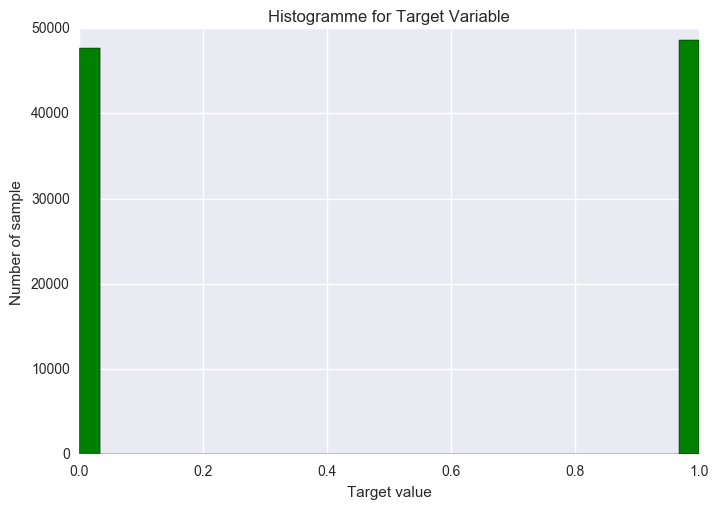

In [86]:
DATATRAIN.target.hist(bins=30, color='g')
plt.xlabel('Target value')
plt.ylabel('Number of sample')
plt.title('Histogramme for Target Variable')
plt.show()

In [17]:
TARGET_FREQUENCE = pd.DataFrame(DATATRAIN.target.value_counts())
TARGET_FREQUENCE['Percentage'] = 100*TARGET_FREQUENCE['target']/DATATRAIN.shape[0]
TARGET_FREQUENCE

target  Percentage
1   48658   50.517027
0   47662   49.482973

# Part 2) Correlation Study

The scatter matrix is a powerful tool allowing us to learn about the correlation available among the continuous variables and the histogramme distribution of each continuous variable (i.e. diagonal). The variables are not normally distributed, it is more about uniformlly distributed. The target variable (red and blue) appear to propose clusters of value.

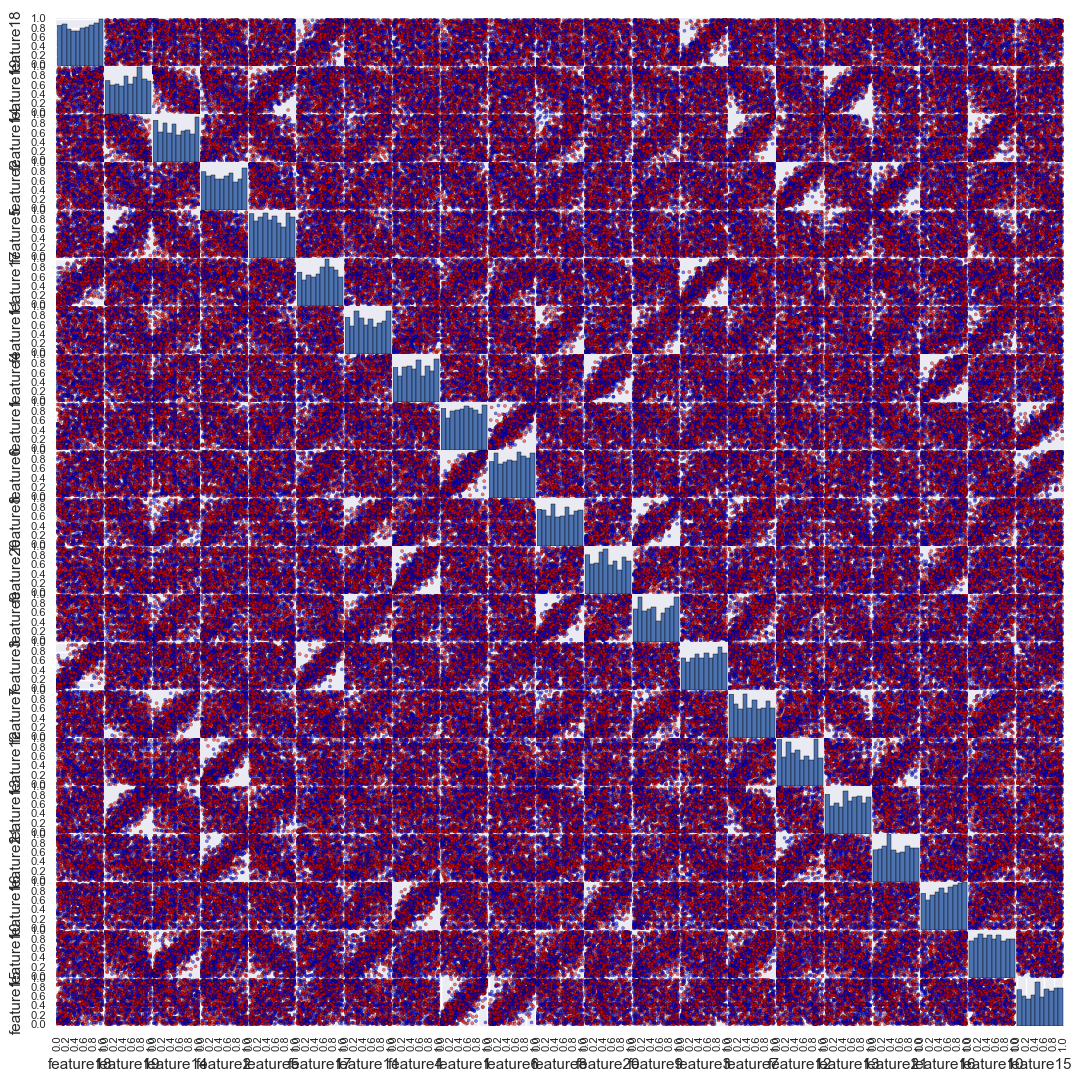

In [3]:
from pandas.tools.plotting import scatter_matrix
colors = {0:'blue', 1:'red'}
sample1 = DATATRAIN.sample(n=1000, replace=False, random_state=42, axis=0)
covariates = list(set(sample1.columns).difference({'target'}))
scatter_matrix(sample1.ix[:,covariates], figsize=(13, 13), diagonal='hist', c=sample1["target"].apply(lambda x:colors[x]));

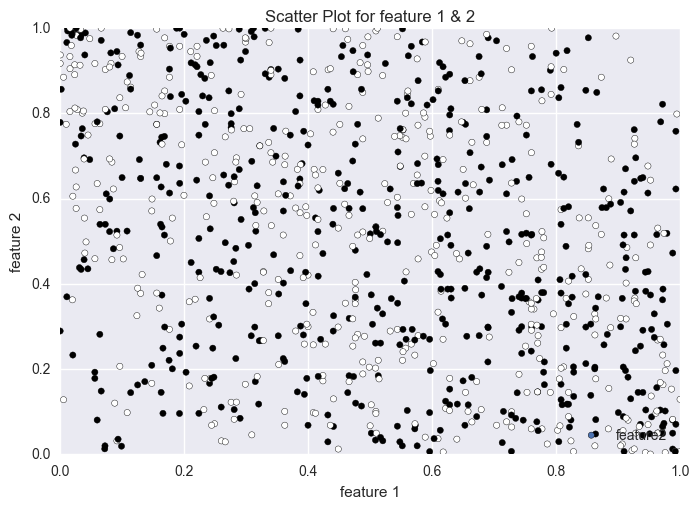

In [4]:
plt.scatter(sample1.feature1, sample1.feature2, c=sample1.target)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Scatter Plot for feature 1 & 2')
plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc='lower right')
plt.show();

In [6]:
MC = sample1.corr()
MC

feature1  feature2  feature3  feature4  feature5  feature6  \
feature1   1.000000 -0.347095  0.395561 -0.171789  0.197887  0.825142   
feature2  -0.347095  1.000000 -0.229483  0.115834 -0.326515 -0.261605   
feature3   0.395561 -0.229483  1.000000 -0.178170  0.104493  0.329956   
feature4  -0.171789  0.115834 -0.178170  1.000000 -0.150262 -0.190184   
feature5   0.197887 -0.326515  0.104493 -0.150262  1.000000  0.146229   
feature6   0.825142 -0.261605  0.329956 -0.190184  0.146229  1.000000   
feature7  -0.179227  0.300935 -0.105786  0.231172 -0.381592 -0.174730   
feature8  -0.222167  0.348634 -0.129537  0.389714 -0.330023 -0.172805   
feature9  -0.181918  0.321090 -0.126802  0.326478 -0.285797 -0.173453   
feature10 -0.213458  0.287636 -0.112476  0.208407 -0.571790 -0.172924   
feature11 -0.176842  0.251970 -0.118171  0.309406 -0.360183 -0.153166   
feature12 -0.278184  0.846103 -0.178935  0.116867 -0.289261 -0.311577   
feature13  0.120681 -0.313103  0.076985 -0.173042  0.509275  0.127955   
feature14 -0.241312  0.351141 -0.127469  0.265820 -0.514781 -0.190246   
feature15  0.810724 -0.314961  0.319374 -0.123068  0.188907  0.682661   
feature16 -0.156972  0.078284 -0.166334  0.803723 -0.132586 -0.185974   
feature17  0.360581 -0.218187  0.847197 -0.213984  0.101157  0.416729   
feature18  0.289938 -0.172484  0.799148 -0.102527  0.121580  0.236258   
feature19  0.181517 -0.375861  0.091556 -0.202072  0.711049  0.118999   
feature20 -0.164189  0.114331 -0.180399  0.777544 -0.154686 -0.156616   
feature21 -0.300053  0.778518 -0.237376  0.123654 -0.349820 -0.236443   
target     0.030031 -0.028620  0.060554  0.027954 -0.054894  0.015409   

           feature7  feature8  feature9  feature10    ...     feature13  \
feature1  -0.179227 -0.222167 -0.181918  -0.213458    ...      0.120681   
feature2   0.300935  0.348634  0.321090   0.287636    ...     -0.313103   
feature3  -0.105786 -0.129537 -0.126802  -0.112476    ...      0.076985   
feature4   0.231172  0.389714  0.326478   0.208407    ...     -0.173042   
feature5  -0.381592 -0.330023 -0.285797  -0.571790    ...      0.509275   
feature6  -0.174730 -0.172805 -0.173453  -0.172924    ...      0.127955   
feature7   1.000000  0.572812  0.634407   0.585034    ...     -0.556283   
feature8   0.572812  1.000000  0.841300   0.501095    ...     -0.355640   
feature9   0.634407  0.841300  1.000000   0.435625    ...     -0.367486   
feature10  0.585034  0.501095  0.435625   1.000000    ...     -0.320223   
feature11  0.395600  0.734257  0.652795   0.590913    ...     -0.173787   
feature12  0.307617  0.306253  0.334507   0.260806    ...     -0.318962   
feature13 -0.556283 -0.355640 -0.367486  -0.320223    ...      1.000000   
feature14  0.796702  0.641003  0.561483   0.750934    ...     -0.482226   
feature15 -0.116760 -0.174042 -0.158108  -0.182973    ...      0.092271   
feature16  0.170619  0.293087  0.263892   0.223568    ...     -0.091500   
feature17 -0.119536 -0.114520 -0.126704  -0.091636    ...      0.088015   
feature18 -0.062429 -0.091559 -0.092528  -0.112539    ...      0.084320   
feature19 -0.510844 -0.404643 -0.345861  -0.432125    ...      0.801000   
feature20  0.258134  0.336201  0.390427   0.205340    ...     -0.121275   
feature21  0.224790  0.280404  0.257452   0.286943    ...     -0.229133   
target     0.033725  0.022613  0.032560   0.068613    ...     -0.024845   

           feature14  feature15  feature16  feature17  feature18  feature19  \
feature1   -0.241312   0.810724  -0.156972   0.360581   0.289938   0.181517   
feature2    0.351141  -0.314961   0.078284  -0.218187  -0.172484  -0.375861   
feature3   -0.127469   0.319374  -0.166334   0.847197   0.799148   0.091556   
feature4    0.265820  -0.123068   0.803723  -0.213984  -0.102527  -0.202072   
feature5   -0.514781   0.188907  -0.132586   0.101157   0.121580   0.711049   
feature6   -0.190246   0.682661  -0.185974   0.416729   0.236258   0.118999   
feature7    0.796702  -0.116760   0.170619  -0.11953

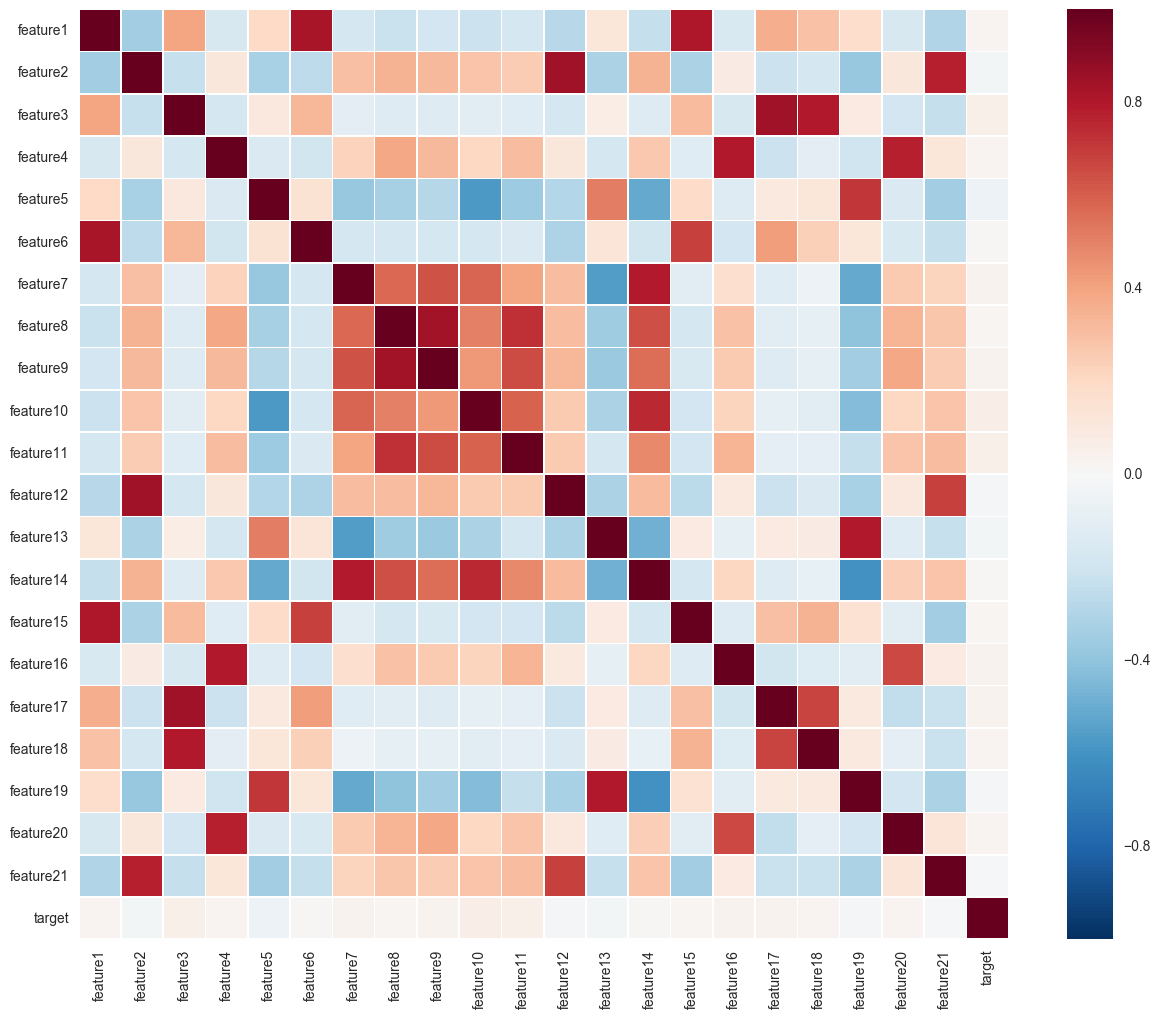

In [33]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(MC,linewidths=.5, ax=ax);

In [45]:
threshold = 0.5
important_corrs = (MC[abs(MC) > threshold][MC != 1.0]) .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) 
for key in important_corrs])), columns=['feature pair', 'correlation coefficient'])

unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['correlation coefficient']).argsort()[::-1]]
unique_important_corrs

feature pair  correlation coefficient
26   (feature17, feature3)                 0.847197
3    (feature12, feature2)                 0.846103
27    (feature8, feature9)                 0.841300
10    (feature1, feature6)                 0.825142
23   (feature1, feature15)                 0.810724
13   (feature16, feature4)                 0.803723
20  (feature13, feature19)                 0.801000
28   (feature18, feature3)                 0.799148
7    (feature14, feature7)                 0.796702
2    (feature2, feature21)                 0.778518
24   (feature20, feature4)                 0.777544
16  (feature10, feature14)                 0.750934
6    (feature11, feature8)                 0.734257
15   (feature19, feature5)                 0.711049
22  (feature12, feature21)                 0.684774
0    (feature15, feature6)                 0.682661
19  (feature17, feature18)                 0.673759
1   (feature16, feature20)                 0.656378
18   (feature11, feature9)                 0.652795
9    (feature14, feature8)                 0.641003
14    (feature7, feature9)                 0.634407
31  (feature14, feature19)                -0.603081
11  (feature10, feature11)                 0.590913
4    (feature10, feature7)                 0.585034
5     (feature7, feature8)                 0.572812
12   (feature10, feature5)                -0.571790
29   (feature14, feature9)                 0.561483
8    (feature13, feature7)                -0.556283
25   (feature14, feature5)                -0.514781
17   (feature19, feature7)                -0.510844
21   (feature13, feature5)                 0.509275
30   (feature10, feature8)                 0.501095

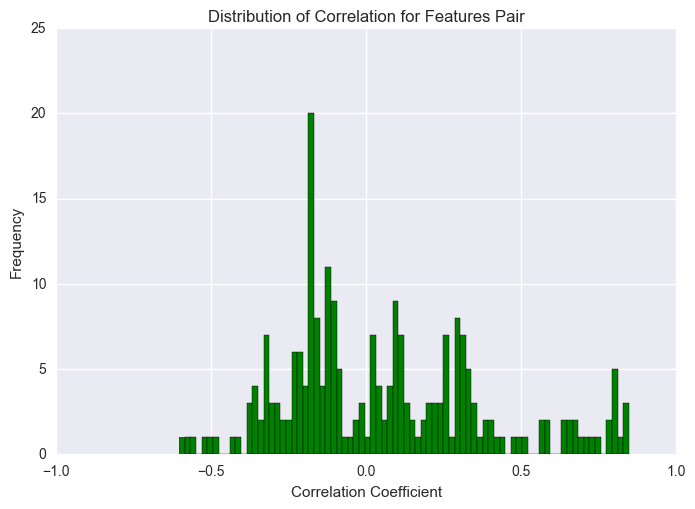

In [89]:
threshold = 0.000
important_corrs = (MC[abs(MC) > threshold][MC != 1.0]) .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) 
for key in important_corrs])), columns=['feature pair', 'correlation coefficient'])

unique_important_corrs1 = unique_important_corrs.ix[abs(unique_important_corrs['correlation coefficient']).argsort()[::-1]]

unique_important_corrs1.hist(bins=80, color='g')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.ylim([0,25])
plt.xlim([-1,1])
plt.title('Distribution of Correlation for Features Pair')
plt.show();

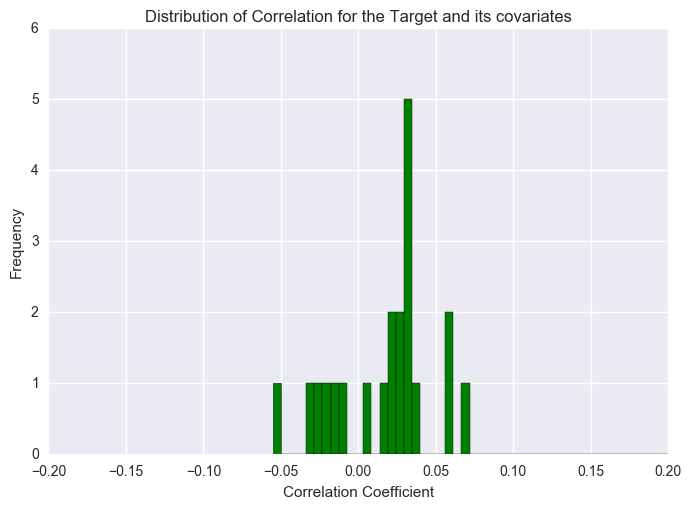

In [97]:
MC.target.hist(bins=200, color='g')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.ylim([0,6])
plt.xlim([-0.2,0.2])
plt.title('Distribution of Correlation for the Target and its covariates')
plt.show();

# Part 3) Benchmark (Modelling without any Preprocessing)

# 3.1 Manual Tuning with Various Algorithms

In [7]:
trainx = DATATRAIN.columns[:-1]
trainy = DATATRAIN.columns[-1]

X = DATATRAIN[trainx]
Y = DATATRAIN[trainy]

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [13]:
start_time = time.clock()

print("")
print("")
print("") 
print("List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)")
print("") 

N_ES = 100
K = 10

start_time = time.clock()

model1 = LogisticRegression()
results1 = cross_val_score(model1, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Logistic Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results1.mean(), results1.std()))

model2 = KNeighborsClassifier(n_neighbors=5)
results2 = cross_val_score(model2, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("K Neighbors Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))

model3 = DecisionTreeClassifier()
results3 = cross_val_score(model3, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Decision Tree Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

model4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=N_ES, random_state=seed)
results4 = cross_val_score(model4, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Bagging Decision Tree (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

model5 = RandomForestClassifier(n_estimators=N_ES, max_features=5)
results5 = cross_val_score(model5, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Random Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results5.mean(), results5.std()))

model6 = ExtraTreesClassifier(n_estimators=N_ES, max_features=5)
results6 = cross_val_score(model6, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Extra Randomized Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results6.mean(), results6.std()))

model7 = AdaBoostClassifier(n_estimators=N_ES, random_state=seed)
results7 = cross_val_score(model7, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("AdaBoost Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results7.mean(), results7.std()))

model8 = GradientBoostingClassifier(n_estimators=N_ES, random_state=seed)
results8 = cross_val_score(model8, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Gradient Boosting Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results8.mean(), results8.std()))

end_time = time.clock()




List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)

Logistic Regression (Manual Tuning): (0.529) +/- (0.006)
K Neighbors Classifier (Manual Tuning): (0.504) +/- (0.004)
Decision Tree Classifier (Manual Tuning): (0.501) +/- (0.006)
Bagging Decision Tree (Manual Tuning): (0.514) +/- (0.008)
Random Forest (Manual Tuning): (0.510) +/- (0.009)
Extra Randomized Forest (Manual Tuning): (0.516) +/- (0.003)
AdaBoost Classifier (Manual Tuning): (0.516) +/- (0.008)
Gradient Boosting Classifier (Manual Tuning): (0.520) +/- (0.009)


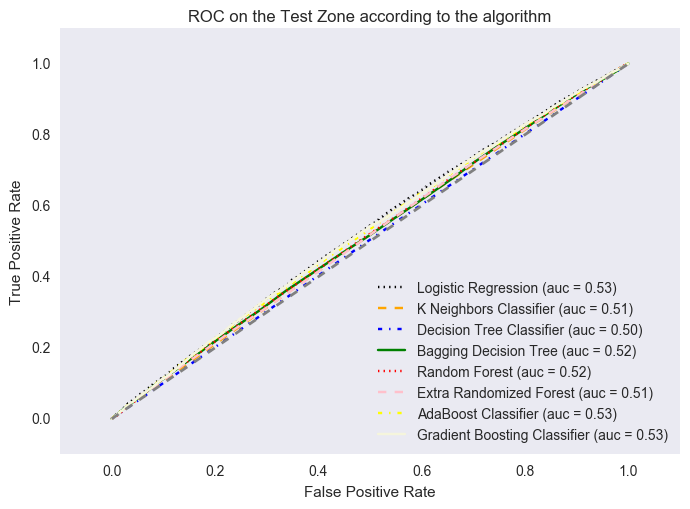

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

all_clf = [model1, model2, model3, model4, model5, model6, model7, model8]

clf_labels = ['Logistic Regression', 'K Neighbors Classifier', 'Decision Tree Classifier', 'Bagging Decision Tree', 'Random Forest', 'Extra Randomized Forest', 'AdaBoost Classifier', 'Gradient Boosting Classifier']

colors = ['black', 'orange', 'blue', 'green', 'red', 'pink', 'yellow', 'beige']

linestyles = [':', '--', '-.', '-',':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.title('ROC on the Test Zone according to the algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# 3.2 Manual Tuning with Neural Network

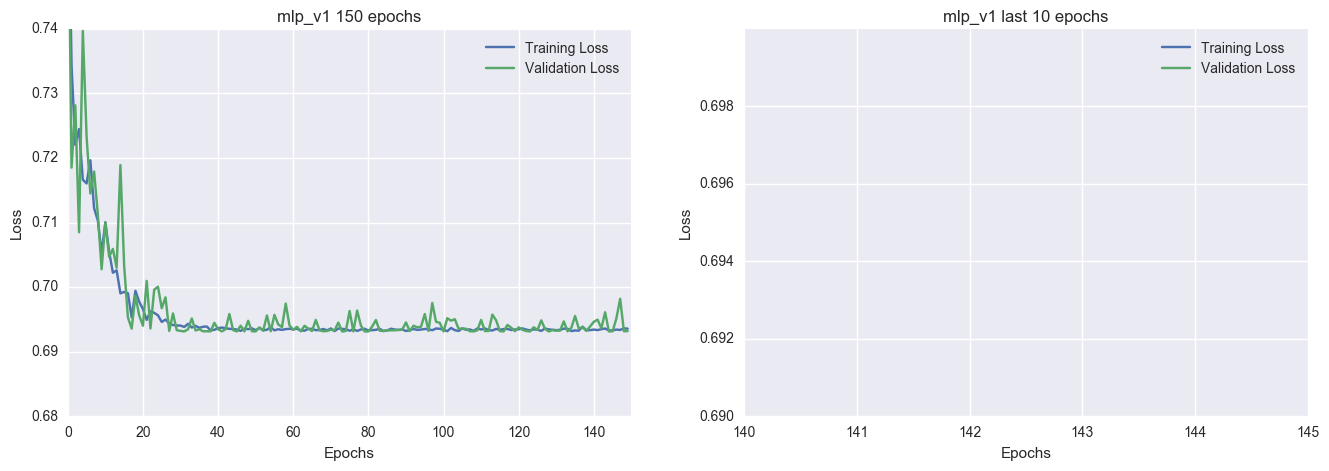

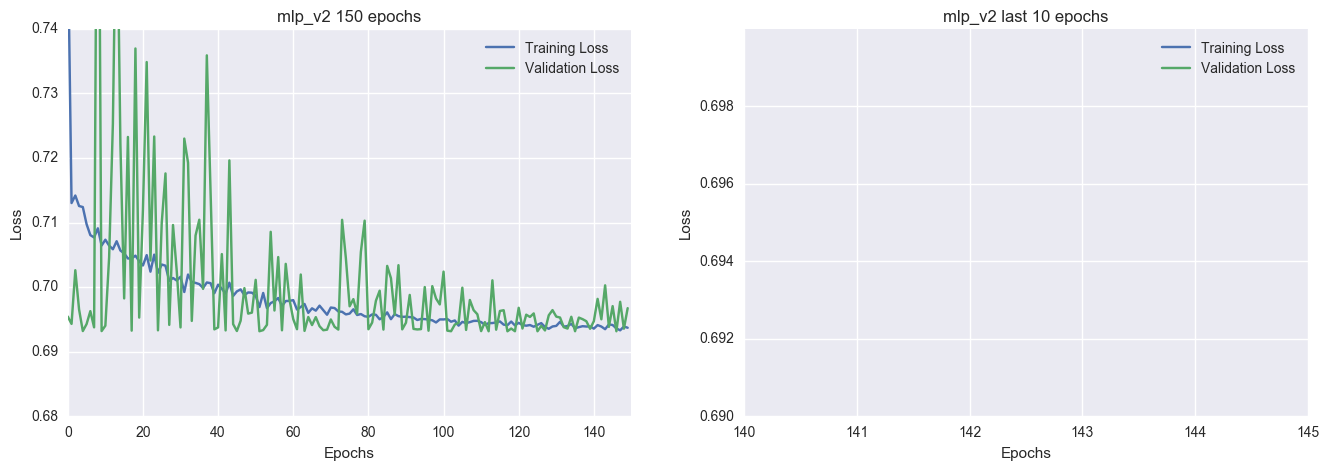

In [82]:
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers.advanced_activations import PReLU
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(400, input_dim=DATATRAIN[trainx].shape[1]))
model.add(Activation('sigmoid'))
model.add(Dense(300))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="rmsprop")

fit = model.fit(DATATRAIN[trainx].values, DATATRAIN[trainy], validation_split=0.2, batch_size=5000, nb_epoch=150, verbose=0)

hist = fit.history

models_history = {}
models_history['mlp_v1'] = hist

model = Sequential()
model.add(Dense(400, input_dim=DATATRAIN[trainx].shape[1]))
model.add(Dropout(0.5))
model.add(Activation('sigmoid'))
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="rmsprop")

fit1 = model.fit(DATATRAIN[trainx].values, DATATRAIN[trainy], validation_split=0.2, batch_size=5000, nb_epoch=150, verbose=0)

hist1 = fit1.history

models_history['mlp_v2'] = hist1

def plot_mlp_loss(history, title):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,5)

    ax1.set_title('{} 150 epochs'.format(title))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_xlim([0,150])
    ax1.set_ylim([0.68,0.74])
    ax1.grid(True)
    ax1.plot(history['loss'][0:150], label='Training Loss')
    ax1.plot(history['val_loss'][0:150], label='Validation Loss')
    ax1.legend()

    ax2.set_title('{} last 10 epochs'.format(title))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xlim([140,150])
    ax2.set_ylim([0.69,0.70])
    ax2.grid(True)
    ax2.set_xticklabels(range(140,150,1))
    ax2.plot(history['loss'][140:150], label='Training Loss')
    ax2.plot(history['val_loss'][140:150], label='Validation Loss')
    ax2.legend()
    
plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  
plot_mlp_loss(models_history['mlp_v2'], 'mlp_v2')

# 4) Preprocessing the Data

# 4.1 Dimensionality Reduction with PCA

In [14]:
from sklearn import decomposition

DATATRAIN_matrix = DATATRAIN.as_matrix()
PCA = decomposition.PCA(n_components=20)
FACTOR_matrix = PCA.fit_transform(DATATRAIN_matrix[:,:-1])
FACTOR_DF = pd.DataFrame(FACTOR_matrix)
FACTOR_DF.head(10)

0         1         2         3         4         5         6   \
0 -0.429555  0.694317 -0.135925 -0.002578  0.198744  0.183172 -0.026735   
1 -0.316584 -0.066286 -0.194630  0.107092 -0.716261  0.270906  0.110102   
2  0.045567 -0.797432 -0.123630  0.051750  0.091450  0.165136 -0.115573   
3 -0.522185 -0.468467 -0.523371 -0.106236 -0.237862 -0.167934 -0.191979   
4 -0.624160  1.130548 -0.478788 -0.116335  0.129016  0.304652 -0.357879   
5 -1.327780  0.477891 -0.553104  0.000935 -0.146141 -0.541505 -0.273253   
6 -0.486918  0.954677 -1.034094 -0.620403  0.051821  0.191935 -0.063314   
7  0.177381  1.008804 -0.210488 -0.618042 -0.539893 -0.263699 -0.082661   
8 -0.315406  0.567282 -0.304937 -0.310662  0.190694 -0.192844 -0.263264   
9 -1.853236  0.513995  0.305492  0.170617  0.177757 -0.044544  0.240075   

         7         8         9         10        11        12        13  \
0 -0.050689 -0.212074 -0.161374 -0.091315  0.066076 -0.019993  0.060577   
1  0.553827 -0.152881 -0.148063 -0.004696  0.095425  0.284278  0.022730   
2  0.156535 -0.202431  0.174474 -0.077925 -0.045853  0.084732 -0.078371   
3  0.056033  0.009254 -0.034946 -0.239643 -0.082513 -0.100051  0.046681   
4 -0.321750  0.018902  0.013637 -0.109500  0.034195  0.143358  0.010020   
5 -0.140949  0.131315  0.185453 -0.155345 -0.120619  0.123851 -0.034769   
6  0.214221 -0.063978  0.239256  0.022836  0.046887 -0.008680  0.091154   
7  0.169180  0.135717  0.141006 -0.564922  0.244349  0.390831 -0.003777   
8 -0.030644  0.171125 -0.020994 -0.438452 -0.501903  0.170769  0.349169   
9 -0.095094 -0.131664 -0.097166 -0.106906  0.152347 -0.009233  0.046483   

         14        15        16        17        18        19  
0 -0.206265  0.087172 -0.041256  0.012963  0.095921 -0.031172  
1  0.197979  0.005280  0.063238 -0.028372 -0.015648 -0.001661  
2  0.202398 -0.041698  0.038646  0.111874 -0.087347 -0.039196  
3 -0.104850 -0.066946  0.013148 -0.047832  0.043336 -0.002521  
4 -0.038075  0.119051  0.022068  0.014518 -0.109310  0.011370  
5 -0.059581  0.056628 -0.082952  0.012423  0.068578  0.023848  
6  0.102521 -0.115358 -0.035715 -0.020948 -0.082248 -0.054995  
7 -0.438330  0.375992  0.055869  0.092042  0.159962  0.052812  
8 -0.145489  0.149676 -0.018133 -0.099430  0.072497 -0.013260  
9  0.029317  0.063847 -0.001488 -0.065355  0.074599 -0.014267

In [16]:
PCA.explained_variance_ratio_

array([ 0.31252339,  0.15429894,  0.12758766,  0.07761714,  0.0669608 ,
        0.06381388,  0.03855168,  0.03385178,  0.01960987,  0.01711989,
        0.01403377,  0.01323165,  0.01186109,  0.00935714,  0.00809533,
        0.00789579,  0.00695358,  0.0051445 ,  0.00462476,  0.00360474])

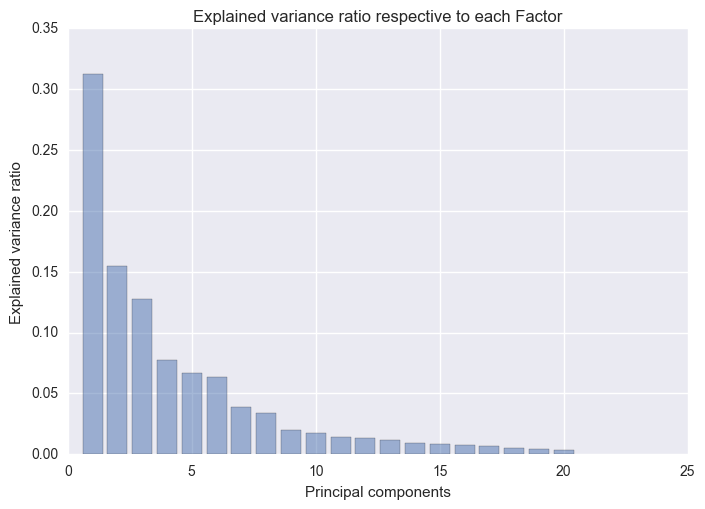

In [18]:
plt.bar(range(1, 21), PCA.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio respective to each Factor')
plt.show()

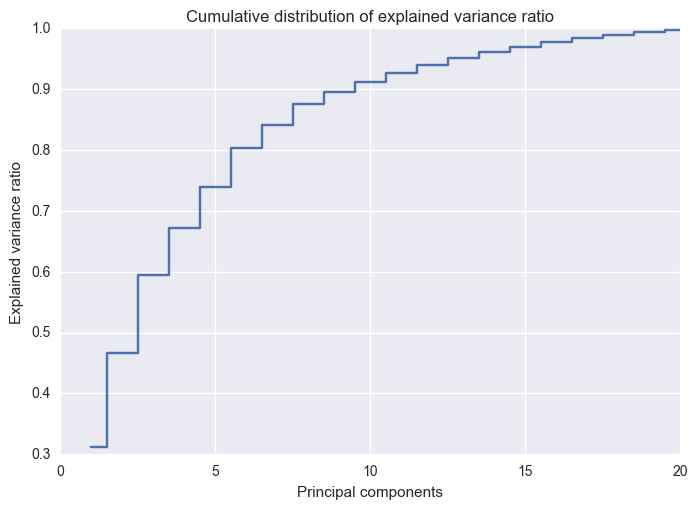

In [19]:
plt.step(range(1, 21), np.cumsum(PCA.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative distribution of explained variance ratio')
plt.show()

In [59]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
PROJECTION = pd.DataFrame(FACTOR_DF)
PROJECTION = PROJECTION.iloc[:,0:8]
PROJECTION.columns = ['FACTOR_1', 'FACTOR_2','FACTOR_3','FACTOR_4', 'FACTOR_5','FACTOR_6', 'FACTOR_7','FACTOR_8']
PROJECTION.head(10)

FACTOR_1  FACTOR_2  FACTOR_3  FACTOR_4  FACTOR_5  FACTOR_6  FACTOR_7  \
0 -0.429555  0.694317 -0.135925 -0.002578  0.198744  0.183172 -0.026735   
1 -0.316584 -0.066286 -0.194630  0.107092 -0.716261  0.270906  0.110102   
2  0.045567 -0.797432 -0.123630  0.051750  0.091450  0.165136 -0.115573   
3 -0.522185 -0.468467 -0.523371 -0.106236 -0.237862 -0.167934 -0.191979   
4 -0.624160  1.130548 -0.478788 -0.116335  0.129016  0.304652 -0.357879   
5 -1.327780  0.477891 -0.553104  0.000935 -0.146141 -0.541505 -0.273253   
6 -0.486918  0.954677 -1.034094 -0.620403  0.051821  0.191935 -0.063314   
7  0.177381  1.008804 -0.210488 -0.618042 -0.539893 -0.263699 -0.082661   
8 -0.315406  0.567282 -0.304937 -0.310662  0.190694 -0.192844 -0.263264   
9 -1.853236  0.513995  0.305492  0.170617  0.177757 -0.044544  0.240075   

   FACTOR_8  
0 -0.050689  
1  0.553827  
2  0.156535  
3  0.056033  
4 -0.321750  
5 -0.140949  
6  0.214221  
7  0.169180  
8 -0.030644  
9 -0.095094

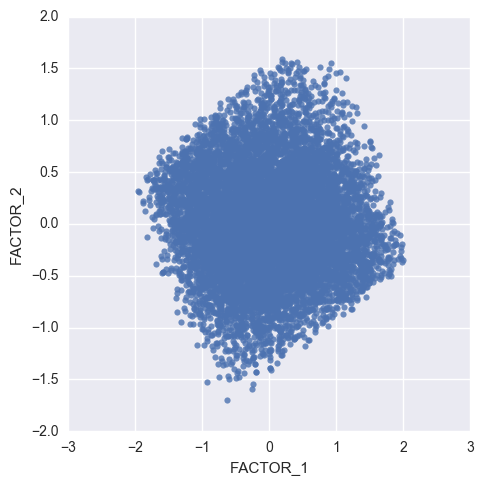

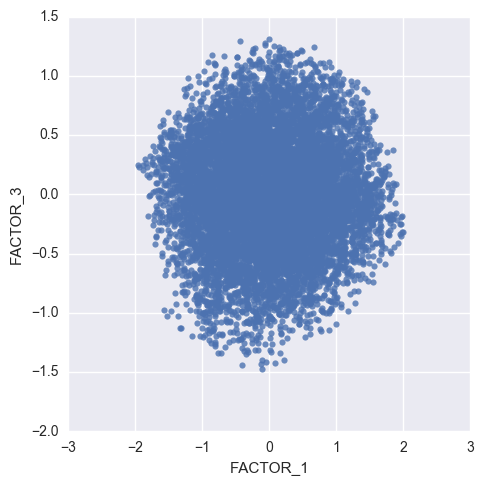

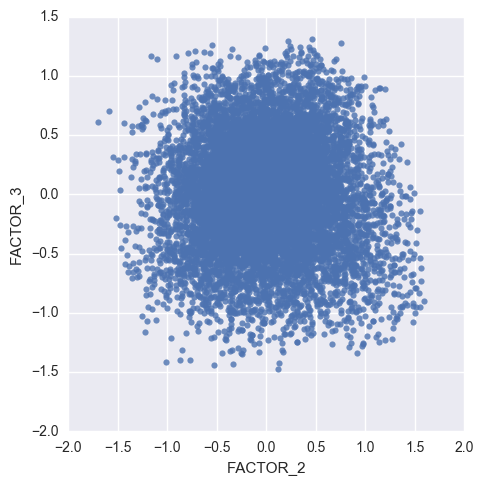

In [60]:
PROJECTION2 = PROJECTION.sample(10000)
sns.lmplot("FACTOR_1", "FACTOR_2", data = PROJECTION2 ,fit_reg=False);
sns.lmplot("FACTOR_1", "FACTOR_3", data = PROJECTION2 ,fit_reg=False);
sns.lmplot("FACTOR_2", "FACTOR_3", data = PROJECTION2 ,fit_reg=False);

In [62]:
DATATRAIN_PC = pd.concat([PROJECTION, Y], axis=1, join_axes=[FACTOR_DF.index])
DATATRAIN_PC.head(10)

FACTOR_1  FACTOR_2  FACTOR_3  FACTOR_4  FACTOR_5  FACTOR_6  FACTOR_7  \
0 -0.429555  0.694317 -0.135925 -0.002578  0.198744  0.183172 -0.026735   
1 -0.316584 -0.066286 -0.194630  0.107092 -0.716261  0.270906  0.110102   
2  0.045567 -0.797432 -0.123630  0.051750  0.091450  0.165136 -0.115573   
3 -0.522185 -0.468467 -0.523371 -0.106236 -0.237862 -0.167934 -0.191979   
4 -0.624160  1.130548 -0.478788 -0.116335  0.129016  0.304652 -0.357879   
5 -1.327780  0.477891 -0.553104  0.000935 -0.146141 -0.541505 -0.273253   
6 -0.486918  0.954677 -1.034094 -0.620403  0.051821  0.191935 -0.063314   
7  0.177381  1.008804 -0.210488 -0.618042 -0.539893 -0.263699 -0.082661   
8 -0.315406  0.567282 -0.304937 -0.310662  0.190694 -0.192844 -0.263264   
9 -1.853236  0.513995  0.305492  0.170617  0.177757 -0.044544  0.240075   

   FACTOR_8  target  
0 -0.050689       0  
1  0.553827       0  
2  0.156535       1  
3  0.056033       1  
4 -0.321750       1  
5 -0.140949       1  
6  0.214221       0  
7  0.169180       1  
8 -0.030644       1  
9 -0.095094       0

In [64]:
trainxx = DATATRAIN_PC.columns[:-1]
trainyy = DATATRAIN_PC.columns[-1]

XX = DATATRAIN_PC[trainxx]
YY = DATATRAIN_PC[trainyy]

seed = 1

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, YY, test_size=0.5, random_state=0)

XX_train = np.array(XX_train)
yy_train = np.array(yy_train)

In [65]:
start_time = time.clock()

print("")
print("")
print("") 
print("List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)")
print("") 

N_ES = 100
K = 10

start_time = time.clock()

model1 = LogisticRegression()
results1 = cross_val_score(model1, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Logistic Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results1.mean(), results1.std()))

model2 = KNeighborsClassifier(n_neighbors=5)
results2 = cross_val_score(model2, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("K Neighbors Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))

model3 = DecisionTreeClassifier()
results3 = cross_val_score(model3, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Decision Tree Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

model4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=N_ES, random_state=seed)
results4 = cross_val_score(model4, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Bagging Decision Tree (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

model5 = RandomForestClassifier(n_estimators=N_ES, max_features=5)
results5 = cross_val_score(model5, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Random Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results5.mean(), results5.std()))

model6 = ExtraTreesClassifier(n_estimators=N_ES, max_features=5)
results6 = cross_val_score(model6, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Extra Randomized Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results6.mean(), results6.std()))

model7 = AdaBoostClassifier(n_estimators=N_ES, random_state=seed)
results7 = cross_val_score(model7, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("AdaBoost Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results7.mean(), results7.std()))

model8 = GradientBoostingClassifier(n_estimators=N_ES, random_state=seed)
results8 = cross_val_score(model8, XX_train, yy_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Gradient Boosting Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results8.mean(), results8.std()))

end_time = time.clock()




List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)

Logistic Regression (Manual Tuning): (0.527) +/- (0.006)
K Neighbors Classifier (Manual Tuning): (0.508) +/- (0.007)
Decision Tree Classifier (Manual Tuning): (0.502) +/- (0.007)
Bagging Decision Tree (Manual Tuning): (0.510) +/- (0.008)
Random Forest (Manual Tuning): (0.513) +/- (0.006)
Extra Randomized Forest (Manual Tuning): (0.514) +/- (0.007)
AdaBoost Classifier (Manual Tuning): (0.517) +/- (0.008)
Gradient Boosting Classifier (Manual Tuning): (0.521) +/- (0.007)


# 4.2) Dimensionality Reduction with T-distributed stochastic neighbor embedding (t-SNE) on top of PCA

In [100]:
DATATRAIN_TSNE = DATATRAIN_PC.sample(n=10000, replace=False, random_state=42, axis=0)
covariates = list(set(DATATRAIN_TSNE.columns).difference({'FACTOR_4', 'FACTOR_5','FACTOR_6', 'FACTOR_7','FACTOR_8'}))
DATATRAIN_TSNE = DATATRAIN_TSNE[covariates]
DATATRAIN_TSNE_X = DATATRAIN_TSNE.iloc[:,0|3]

#DATATRAIN_TSNE_Y = DATATRAIN_TSNE.iloc[:,'target']

In [78]:
from sklearn.manifold import TSNE

start_time = time.clock()

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(DATATRAIN_TSNE)

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")


Total Estimation Running Time:
190.73420171978796 Seconds


In [80]:
X_tsne

array([[ 3.80160993,  3.49626764],
       [ 3.09615282, -5.28296959],
       [ 5.74168443, -0.99147365],
       ..., 
       [-2.43971724, -3.44369   ],
       [ 4.66862973, -5.27202695],
       [-1.09893108,  4.00812947]])

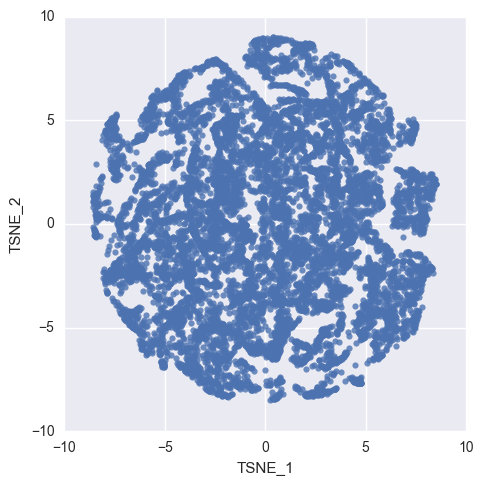

In [82]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
PROJECTION = pd.DataFrame(X_tsne)
PROJECTION.columns = ["TSNE_1", "TSNE_2"]
sns.lmplot("TSNE_1", "TSNE_2", data = PROJECTION ,fit_reg=False);

In [ ]:
print("")
print("")
print("") 
print("List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)")
print("") 

N_ES = 100
K = 10

model1 = LogisticRegression()
results1 = cross_val_score(model1, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
print("Logistic Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results1.mean(), results1.std()))

#model2 = KNeighborsClassifier(n_neighbors=5)
#results2 = cross_val_score(model2, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("K Neighbors Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))

#model3 = DecisionTreeClassifier()
#results3 = cross_val_score(model3, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Decision Tree Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

#model4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=N_ES, random_state=seed)
#results4 = cross_val_score(model4, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Bagging Decision Tree (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

#model5 = RandomForestClassifier(n_estimators=N_ES, max_features=5)
#results5 = cross_val_score(model5, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Random Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results5.mean(), results5.std()))

#model6 = ExtraTreesClassifier(n_estimators=N_ES, max_features=5)
#results6 = cross_val_score(model6, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Extra Randomized Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results6.mean(), results6.std()))

#model7 = AdaBoostClassifier(n_estimators=N_ES, random_state=seed)
#results7 = cross_val_score(model7, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("AdaBoost Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results7.mean(), results7.std()))

#model8 = GradientBoostingClassifier(n_estimators=N_ES, random_state=seed)
#results8 = cross_val_score(model8, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Gradient Boosting Classifier (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results8.mean(), results8.std()))

Work in Progress...
Work in Progress...
Work in Progress...